<a href="https://colab.research.google.com/github/ghanbarifereshteh/singlecolorprj/blob/main/noisysinglecolornew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from PIL import Image
from numpy import asarray
import shutil
import os

In [7]:
#generate original data
#generate 3 random number and then create a 180*180 image(with single color)
from PIL import Image
def createimage(numberOfimg,sizeOfImage):
  for i in range(numberOfimg):
    red = np.random.choice(range(256), size=1)
    green = np.random.choice(range(256), size=1)
    blue = np.random.choice(range(256), size=1)
    img = Image.new('RGB', (sizeOfImage, sizeOfImage), (red[0], green[0], blue[0]))
    img.save(str(i)+".jpg")

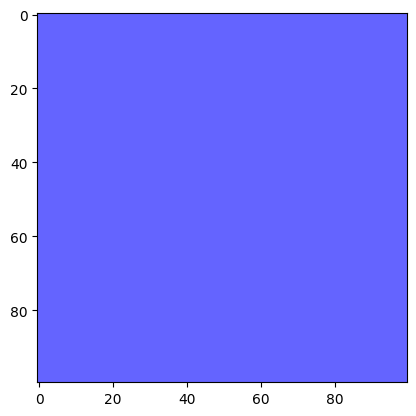

In [ ]:
img = Image.new('RGB', (100, 100), (100, 100, 255))
plt.imshow(img)

In this notebook, we have a function that generates images with noises. we send the percent of the noise we want, so the images are created.and also this function creates 7 folders and classifies data.

In [8]:
#create image whith percent% noise
def createNoisyImage(numberOfImages,sizeOfImage,percent):
  folder = ""
  label = 0
  sum = 0
  os.mkdir("/content/noisyred"+str(percent))
  os.mkdir("/content/noisygreen"+str(percent))
  os.mkdir("/content/noisyblue"+str(percent))
  os.mkdir("/content/noisyblack"+str(percent))
  os.mkdir("/content/noisywhite"+str(percent))
  os.mkdir("/content/noisyyellow"+str(percent))
  os.mkdir("/content/noisypurple"+str(percent))
  numpydata_noisy = np.empty([numberOfImages, sizeOfImage, sizeOfImage, 3], dtype=np.int)
  labels_noisy = np.arange(0,numberOfImages)
  for i in range(0,numberOfImages):
    #before applying noises, we must distinguish the color
    name = str(i)+".jpg"
    img = Image.open(name)
    numpydata_noisy[i] = asarray(img)
    red = numpydata_noisy[i][0][0][0]
    green = numpydata_noisy[i][0][0][1]
    blue = numpydata_noisy[i][0][0][2]
    if(red > green):
      if(red>blue):
        label = 0  #red
        folder = "noisyred"
      elif (red == blue) and (blue==green) and (red == 255):
        label = 1 #white
        folder = "noisywhite"
      elif(red == blue) and (blue==green) and (red != 255):
        label = 2  #black
        folder = "noisyblack"
      elif(red == blue):
        label = 3  #purple
        folder = "noisypurple"
    elif(green>=blue) and (blue > red) :
      label = 5 #green
      folder = "noisygreen"
    elif (red == green) and (blue < red):
      label = 4 #yellow
      folder = "noisyyellow"
    else:
      label = 6 #blue
      folder = "noisyblue"
    labels_noisy[i] = label

    noiseColor=list(np.random.choice(range(256), size=3));
    for j in range(0,sizeOfImage*percent) :
        x=np.random.choice(range(100))
        y=np.random.choice(range(100))
        img.putpixel((x,y), (noiseColor[0], noiseColor[1], noiseColor[2]))
        #plt.imshow(img)
    newName = "noise"+str(percent)+str(i)+".jpg"
    img.save(newName)
    shutil.move("noise"+str(percent)+str(i)+".jpg", str(folder)+str(percent)+"/"+"noise"+str(percent)+str(i)+".jpg")
    numpydata_noisy[i] = asarray(img)
  return labels_noisy,numpydata_noisy

for start creating data and training run codes below.
we first remove any folder in the root.because the training model use the folders in the directory path as classes.


In [3]:
rm -rf noisy*

In [4]:
ls

sample_data/


we create 1000 images as a single color dataset.

In [9]:
createimage(1000,100)

and then make them noisy.

In [10]:
(labels_test,numpydata_test) = createNoisyImage(1000,100,15)

<ipython-input-8-24059ec8fe24>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpydata_noisy = np.empty([numberOfImages, sizeOfImage, sizeOfImage, 3], dtype=np.int)


In [34]:
cd noisyred15/

/content/noisyred15


In [35]:
ls

noise15105.jpg  noise15304.jpg  noise15506.jpg  noise15665.jpg  noise15821.jpg
noise15106.jpg  noise15306.jpg  noise15509.jpg  noise15667.jpg  noise15822.jpg
noise15107.jpg  noise15307.jpg  noise15510.jpg  noise15668.jpg  noise15823.jpg
noise15108.jpg  noise15309.jpg  noise15511.jpg  noise15670.jpg  noise15824.jpg
noise1510.jpg   noise15311.jpg  noise15515.jpg  noise15671.jpg  noise15825.jpg
noise15116.jpg  noise15315.jpg  noise15516.jpg  noise15672.jpg  noise15826.jpg
noise1511.jpg   noise15316.jpg  noise15522.jpg  noise15673.jpg  noise15827.jpg
noise15126.jpg  noise15317.jpg  noise15523.jpg  noise15676.jpg  noise15828.jpg
noise15127.jpg  noise15318.jpg  noise15524.jpg  noise15677.jpg  noise15829.jpg
noise15129.jpg  noise15329.jpg  noise15533.jpg  noise15678.jpg  noise15830.jpg
noise1512.jpg   noise15331.jpg  noise15537.jpg  noise1567.jpg   noise15831.jpg
noise15133.jpg  noise15332.jpg  noise15539.jpg  noise15683.jpg  noise15833.jpg
noise15137.jpg  noise15338.jpg  noise15546.jpg  nois

In [ ]:
after creating noisy images, please go further to start training.
And for creating noisy images with other percent of noise, run the corresponding command bellow. be carefull to remove remaining folders.

6


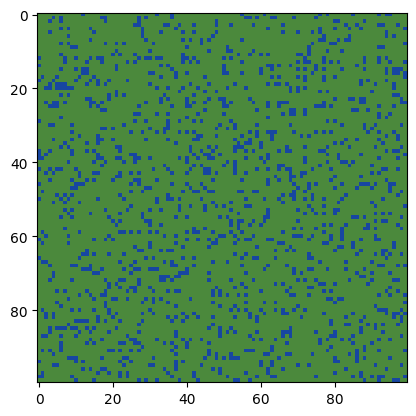

In [18]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[141])
print(labels_test[141])

6


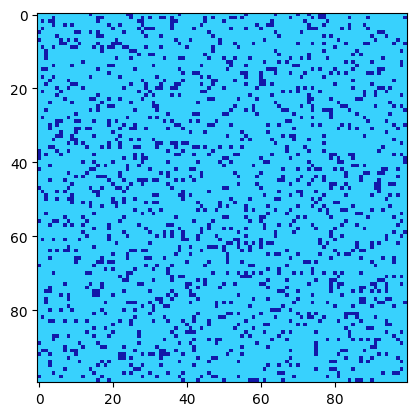

In [28]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[722])
print(labels_test[722])

0


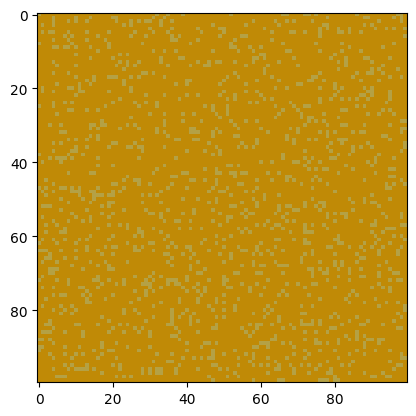

In [36]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[366])
print(labels_test[366])

when you want to create iamges with 25% noises

In [ ]:
rm -rf noisy*

In [ ]:
(labels_test,numpydata_test) = createNoisyImage(1000,100,25)

In [ ]:
ls

noise25938.jpg


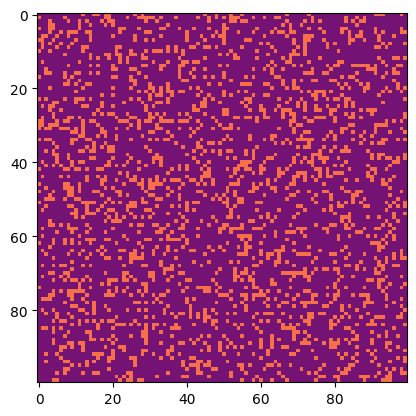

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[938])

In [ ]:
rm -rf noisy*

In [ ]:
(labels_test,numpydata_test) = createNoisyImage(1000,100,45)

<ipython-input-31-7adefc49a481>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpydata_noisy = np.empty([numberOfImages, sizeOfImage, sizeOfImage, 3], dtype=np.int)


In [ ]:
cd noisygreen15/

/content/noisygreen15


In [ ]:
ls

noise1510.jpg   noise15241.jpg  noise15450.jpg  noise15637.jpg  noise15816.jpg
noise15110.jpg  noise15248.jpg  noise15455.jpg  noise15638.jpg  noise15839.jpg
noise15112.jpg  noise15249.jpg  noise15467.jpg  noise1563.jpg   noise15842.jpg
noise15118.jpg  noise15259.jpg  noise15470.jpg  noise1564.jpg   noise15843.jpg
noise15119.jpg  noise15266.jpg  noise15471.jpg  noise15655.jpg  noise15850.jpg
noise15121.jpg  noise15271.jpg  noise15472.jpg  noise15659.jpg  noise15863.jpg
noise15122.jpg  noise15272.jpg  noise15475.jpg  noise15660.jpg  noise15864.jpg
noise15125.jpg  noise15289.jpg  noise15479.jpg  noise15664.jpg  noise15868.jpg
noise15126.jpg  noise15290.jpg  noise15480.jpg  noise15671.jpg  noise15869.jpg
noise15127.jpg  noise15295.jpg  noise15481.jpg  noise15680.jpg  noise15871.jpg
noise15129.jpg  noise15299.jpg  noise15494.jpg  noise15682.jpg  noise15877.jpg
noise15132.jpg  noise15302.jpg  noise15495.jpg  noise15684.jpg  noise15881.jpg
noise15133.jpg  noise15319.jpg  noise15498.jpg  nois

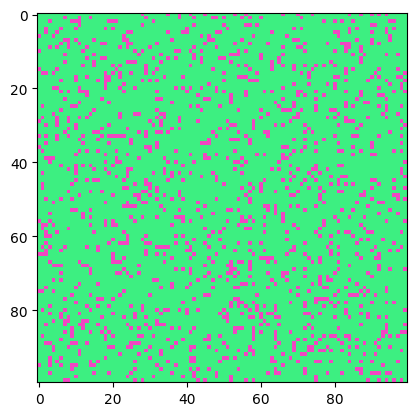

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(numpydata_test[987])

In [ ]:
ls

0.jpg    213.jpg  327.jpg  440.jpg  554.jpg  668.jpg  781.jpg  895.jpg
100.jpg  214.jpg  328.jpg  441.jpg  555.jpg  669.jpg  782.jpg  896.jpg
101.jpg  215.jpg  329.jpg  442.jpg  556.jpg  66.jpg   783.jpg  897.jpg
102.jpg  216.jpg  32.jpg   443.jpg  557.jpg  670.jpg  784.jpg  898.jpg
103.jpg  217.jpg  330.jpg  444.jpg  558.jpg  671.jpg  785.jpg  899.jpg
104.jpg  218.jpg  331.jpg  445.jpg  559.jpg  672.jpg  786.jpg  89.jpg
105.jpg  219.jpg  332.jpg  446.jpg  55.jpg   673.jpg  787.jpg  8.jpg
106.jpg  21.jpg   333.jpg  447.jpg  560.jpg  674.jpg  788.jpg  900.jpg
107.jpg  220.jpg  334.jpg  448.jpg  561.jpg  675.jpg  789.jpg  901.jpg
108.jpg  221.jpg  335.jpg  449.jpg  562.jpg  676.jpg  78.jpg   902.jpg
109.jpg  222.jpg  336.jpg  44.jpg   563.jpg  677.jpg  790.jpg  903.jpg
10.jpg   223.jpg  337.jpg  450.jpg  564.jpg  678.jpg  791.jpg  904.jpg
110.jpg  224.jpg  338.jpg  451.jpg  565.jpg  679.jpg  792.jpg  905.jpg
111.jpg  225.jpg  339.jpg  452.jpg  566.jpg  67.jpg   793.jpg  906.jpg
112.jpg  

In [19]:
batch_size = 20
img_height = 100
img_width = 100
data_dir = "/content"

In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 9 classes.
Using 200 files for validation.


In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 9 classes.
Using 800 files for training.


In [22]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()


In [ ]:
ls

0.jpg    214.jpg  329.jpg  443.jpg  558.jpg  672.jpg  787.jpg  900.jpg
100.jpg  215.jpg  32.jpg   444.jpg  559.jpg  673.jpg  788.jpg  901.jpg
101.jpg  216.jpg  330.jpg  445.jpg  55.jpg   674.jpg  789.jpg  902.jpg
102.jpg  217.jpg  331.jpg  446.jpg  560.jpg  675.jpg  78.jpg   903.jpg
103.jpg  218.jpg  332.jpg  447.jpg  561.jpg  676.jpg  790.jpg  904.jpg
104.jpg  219.jpg  333.jpg  448.jpg  562.jpg  677.jpg  791.jpg  905.jpg
105.jpg  21.jpg   334.jpg  449.jpg  563.jpg  678.jpg  792.jpg  906.jpg
106.jpg  220.jpg  335.jpg  44.jpg   564.jpg  679.jpg  793.jpg  907.jpg
107.jpg  221.jpg  336.jpg  450.jpg  565.jpg  67.jpg   794.jpg  908.jpg
108.jpg  222.jpg  337.jpg  451.jpg  566.jpg  680.jpg  795.jpg  909.jpg
109.jpg  223.jpg  338.jpg  452.jpg  567.jpg  681.jpg  796.jpg  90.jpg
10.jpg   224.jpg  339.jpg  453.jpg  568.jpg  682.jpg  797.jpg  910.jpg
110.jpg  225.jpg  33.jpg   454.jpg  569.jpg  683.jpg  798.jpg  911.jpg
111.jpg  226.jpg  340.jpg  455.jpg  56.jpg   684.jpg  799.jpg  912.jpg
112.jpg

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

history = model.fit(numpydata_test, labels_test, epochs=10)

Epoch 1/10
32/32 [==============================] - 12s 345ms/step - loss: 18.1065 - acc: 0.5600
Epoch 2/10
32/32 [==============================] - 11s 342ms/step - loss: 0.9620 - acc: 0.6340
Epoch 3/10
32/32 [==============================] - 11s 342ms/step - loss: 0.9871 - acc: 0.6650
Epoch 4/10
32/32 [==============================] - 11s 349ms/step - loss: 0.7806 - acc: 0.6960
Epoch 5/10
32/32 [==============================] - 11s 340ms/step - loss: 1.0955 - acc: 0.6320
Epoch 6/10
32/32 [==============================] - 11s 340ms/step - loss: 1.2197 - acc: 0.5240
Epoch 7/10
32/32 [==============================] - 10s 315ms/step - loss: 1.0141 - acc: 0.5790
Epoch 8/10
32/32 [==============================] - 11s 339ms/step - loss: 1.0589 - acc: 0.6650
Epoch 9/10
32/32 [==============================] - 11s 341ms/step - loss: 1.0352 - acc: 0.6560
Epoch 10/10
32/32 [==============================] - 11s 346ms/step - loss: 0.8195 - acc: 0.7300


we can test some of our data. the image with number 141 was drawn an its label is 6. lets see that how out network predict its color.

In [27]:
import numpy as np
model(numpydata_test)[141]
np.argmax(model(numpydata_test)[141])

6

In [32]:
import numpy as np
model(numpydata_test)[722]
print(model(numpydata_test)[722])
np.argmax(model(numpydata_test)[722])

tf.Tensor(
[ 2.6114063  -4.4213905  -6.195866   -0.10071872  0.29045317  1.2520814
  2.730952   -5.4395328  -3.6727228  -5.4016643 ], shape=(10,), dtype=float32)


6

now we test an image of another color. those image are blue and were predicted correctly.

In [37]:
print(model(numpydata_test)[366])
np.argmax(model(numpydata_test)[366])

tf.Tensor(
[ 21.352667  -32.844677  -43.38867    -1.4409175   1.6609558  12.937952
  19.052536  -38.42757   -26.717478  -39.21145  ], shape=(10,), dtype=float32)


0

this image is red and was predicted correctly inspite of noises made on it.

In [31]:
class_names = val_ds.class_names
print(class_names)

['.config', 'noisyblack15', 'noisyblue15', 'noisygreen15', 'noisypurple15', 'noisyred15', 'noisywhite15', 'noisyyellow15', 'sample_data']


In [ ]:
cd noisy

result of validation on images with 15% noises

Epoch 1/10
32/32 [==============================] - 2s 14ms/step - loss: 23.3167 - acc: 0.5580
Epoch 2/10
32/32 [==============================] - 0s 13ms/step - loss: 1.1656 - acc: 0.5690
Epoch 3/10
32/32 [==============================] - 0s 13ms/step - loss: 0.9001 - acc: 0.5720
Epoch 4/10
32/32 [==============================] - 0s 14ms/step - loss: 0.9191 - acc: 0.6100
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 1.4659 - acc: 0.4780
Epoch 6/10
32/32 [==============================] - 0s 14ms/step - loss: 1.4780 - acc: 0.6610
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 1.2863 - acc: 0.6870
Epoch 8/10
32/32 [==============================] - 1s 16ms/step - loss: 1.1594 - acc: 0.6840
Epoch 9/10
32/32 [==============================] - 0s 13ms/step - loss: 0.9598 - acc: 0.6970
Epoch 10/10
32/32 [==============================] - 0s 13ms/step - loss: 0.8754 - acc: 0.6960


result of validation on images with 25% noises

Epoch 1/10
32/32 [==============================] - 2s 14ms/step - loss: 50.5913 - acc: 0.5270
Epoch 2/10
32/32 [==============================] - 0s 13ms/step - loss: 1.1217 - acc: 0.6170
Epoch 3/10
32/32 [==============================] - 0s 12ms/step - loss: 0.7228 - acc: 0.7160
Epoch 4/10
32/32 [==============================] - 0s 12ms/step - loss: 0.6273 - acc: 0.7380
Epoch 5/10
32/32 [==============================] - 0s 13ms/step - loss: 0.6090 - acc: 0.7480
Epoch 6/10
32/32 [==============================] - 0s 13ms/step - loss: 0.5925 - acc: 0.7560
Epoch 7/10
32/32 [==============================] - 0s 12ms/step - loss: 0.5152 - acc: 0.7970
Epoch 8/10
32/32 [==============================] - 0s 13ms/step - loss: 0.4877 - acc: 0.8060
Epoch 9/10
32/32 [==============================] - 0s 13ms/step - loss: 0.6852 - acc: 0.7500
Epoch 10/10
32/32 [==============================] - 0s 13ms/step - loss: 0.5254 - acc: 0.7950

result of validation on images with 45% noises

Epoch 1/10
32/32 [==============================] - 3s 16ms/step - loss: 29.4900 - acc: 0.3580
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 1.2315 - acc: 0.4990
Epoch 3/10
32/32 [==============================] - 0s 14ms/step - loss: 1.1706 - acc: 0.4840
Epoch 4/10
32/32 [==============================] - 0s 14ms/step - loss: 1.1235 - acc: 0.4900
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 1.1577 - acc: 0.4790
Epoch 6/10
32/32 [==============================] - 0s 13ms/step - loss: 2.0312 - acc: 0.3690
Epoch 7/10
32/32 [==============================] - 0s 13ms/step - loss: 1.8527 - acc: 0.3870
Epoch 8/10
32/32 [==============================] - 0s 12ms/step - loss: 1.6437 - acc: 0.3980
Epoch 9/10
32/32 [==============================] - 0s 13ms/step - loss: 1.4801 - acc: 0.3980
Epoch 10/10
32/32 [==============================] - 0s 13ms/step - loss: 1.3650 - acc: 0.3980


In [ ]:
rm -rf tf

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(numpydata_test,  labels_test, verbose=2)